### Problem 1
Create any multiple linear model. For example, it may be $y = 3x_1 + 5x_2 + \mu$ or $y = 4x_1 - 3x_2 + 9x_3 + \mu$. Then:
    - (a) generate random 30 observations depend on the model.
    - (b) fit a linear model depends on the observations generated by step (a), and record the coefficients.
    - (c) repeat (a) and (b) 100 times. Calculate the mean and variance of the coefficients.
Note that each time the generated observations should come from the sample distribution. If you do not understand, just use the `random.rand` function. 



### Answer 1
For example the true model is:
$$Y = x_1 + 2x_2 + \mu$$

In [2]:
from sklearn import linear_model
import numpy as np
coefs = []
ols = linear_model.LinearRegression()
np.random.seed(100)
for i in range(100):
    x = np.random.rand(30, 2)
    y = x[:, 0] + 2*x[:, 1] + np.random.rand(30)
    ols.fit(x, y)
    coefs.append(ols.coef_)

print("The mean of the estimated coefficients are: " + str(np.mean(coefs, 0)))
print("The variance of the estimated coefficients are: " + str(np.var(coefs, 0)))

The mean of the estimated coefficients are: [ 1.01364387  2.01981367]
The variance of the estimated coefficients are: [ 0.0346508   0.03255635]


Note that the mean of the estimated coefficients is very closed to the true coefficients. And the variance is very small.

### Problem 2
This question involves the use of simple linear regression on the Auto data set(In the file "Auto.csv"). Perform a simple linear regression with *mpg* as the response and *horsepower* as the predictor. 
    - (a) What is the coefficient of horsepower? How to explain it?
    - (b) What is the coefficient of determination of the model? How to explain it?
    - (c) Write down the formula of the model.
    - (d) What is the predicted mpg associated with a horsepower of 98?
    - (e) Plot the response and the predictor.  as well as the least squares regression line.
    

### Answer 2

Horsepower coefficient: [[-0.15784473]]
0.605948257889
[array([[-0.15784473]]), array([ 39.93586102])]
[[ 24.46707715]]


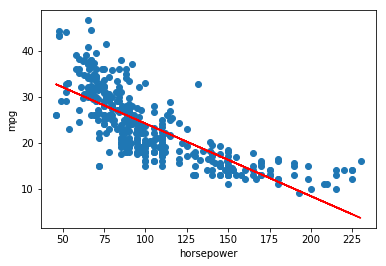

In [4]:
import pandas as pd
auto = pd.read_csv('data/Auto.csv')
auto.head()
x = auto[['horsepower']]
y = auto[['mpg']]

from sklearn import linear_model
ols = linear_model.LinearRegression()
ols.fit(x, y)
# (a) coefficient
print('Horsepower coefficient: {}'.format(ols.coef_))

# (b) coefficient of determination
print(ols.score(x, y))

# (c) formula
print([ols.coef_, ols.intercept_])

# (d) prediction
x_new = np.array([98]).reshape(-1, 1)
print(ols.predict(x_new))

# (e)plot
import matplotlib.pyplot as plt
plt.scatter(x ,y)
plt.plot(x, ols.predict(x), color='red')
plt.xlabel('horsepower')
plt.ylabel('mpg')
plt.show()

- (a) The coefficient of variable is -0.1578, say one unit's increasing on horsepower will result in 0.1578 unit's decreasing on mpg.
- (b) The coefficient of determination is 60.1%; 60.1% of the variance of mpg can be explained by the horsepower variable.
- (c) The formula of the model is $$\text{mpg} = -0.1578*\text{horsepower} + 39.9359$$
- (d)  24.4671.

### Problem 3
Without using the sklearn library, calculate the coefficients manually by employing the numpy library, as well as the coefficient of determination and prediction. Note that the results should be exactly the same with the results in question (2).


### Answer 3

In [3]:
import pandas as pd
auto = pd.read_csv('data/Auto.csv')
auto.head()
y = auto[['mpg']]
x = auto[['horsepower']]

import numpy as np
x = np.mat(x)
x = np.column_stack((np.ones([x.shape[0], 1]), x))
y = np.mat(y)
## estimatation
estimate = (x.T*x).I * x.T * y
print("The coefficients are: \n" + str(estimate) + '\n')

## determination
prediction = x * estimate
deter = (prediction - y.mean()).T * (prediction - y.mean()) / ((y - y.mean()).T * (y - y.mean()))
print("The determination is: " + str(deter) + '\n')

## prediction
pred = np.mat([1, 98]) * estimate
print("The prediction of horsepower=98 is: " + str(pred))

The coefficients are: 
[[ 39.93586102]
 [ -0.15784473]]

The determination is: [[ 0.60594826]]

The prediction of horsepower=98 is: [[ 24.46707715]]
